In [19]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
import numpy as np
import os
import gdal
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
location = (r'/g/data/xc0/user/walker/sjw603/dem_5m')
os.chdir(location)

In [3]:
#Using gdal.

ds = gdal.Open('fitz_f12.tif')
myarray = np.array(ds.GetRasterBand(1).ReadAsArray())
g = myarray.min()

#b = np.array([1,2,3,4], dtype=float)

myarray[myarray==g] = 0

print (myarray)

[[ 10000.  10000.  10000. ...,  10000.  10000.  10000.]
 [ 10000.  10000.  10000. ...,  10000.  10000.  10000.]
 [ 10000.  10000.  10000. ...,  10000.  10000.  10000.]
 ..., 
 [ 10000.  10000.  10000. ...,  10000.  10000.  10000.]
 [ 10000.  10000.  10000. ...,  10000.  10000.  10000.]
 [ 10000.  10000.  10000. ...,  10000.  10000.  10000.]]


In [4]:
myarray[myarray==10000]= 0
#np.nan

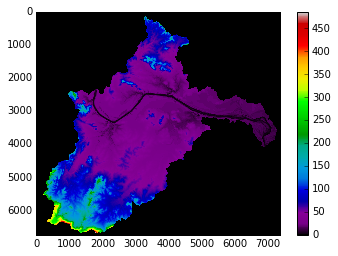

In [5]:
plt.imshow(myarray, cmap="nipy_spectral")
plt.colorbar()

In [6]:
rows = range(myarray.shape[0])
print ('rows:', rows)
columns = range(myarray.shape[1])
print ('columns:', columns)

rows: range(0, 6751)
columns: range(0, 7374)


In [7]:
subplot_1 = myarray[[[46], [47], [48]], [46, 47]]

<IPython.core.display.Javascript object>


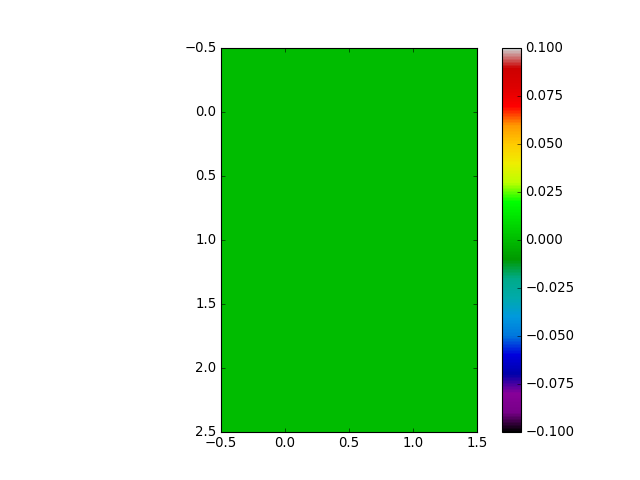

In [8]:
%matplotlib notebook 
plt.imshow(subplot_1, interpolation='nearest', cmap="nipy_spectral")
plt.colorbar()

<IPython.core.display.Javascript object>


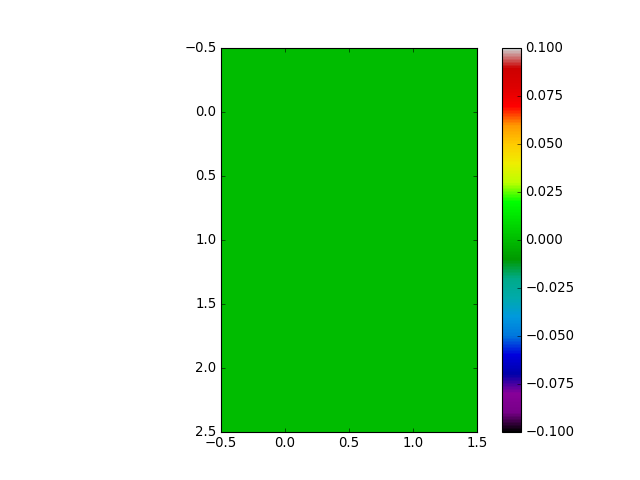

In [28]:
plt.imshow(subplot_1, cmap="nipy_spectral")
plt.colorbar()

In [9]:
from scipy.ndimage.filters import percentile_filter
from scipy.ndimage.filters import uniform_filter

In [10]:
I2 = percentile_filter(myarray, 90, size=20, mode = 'constant')
subset = I2[2000:2800, 3000:3800]

<IPython.core.display.Javascript object>


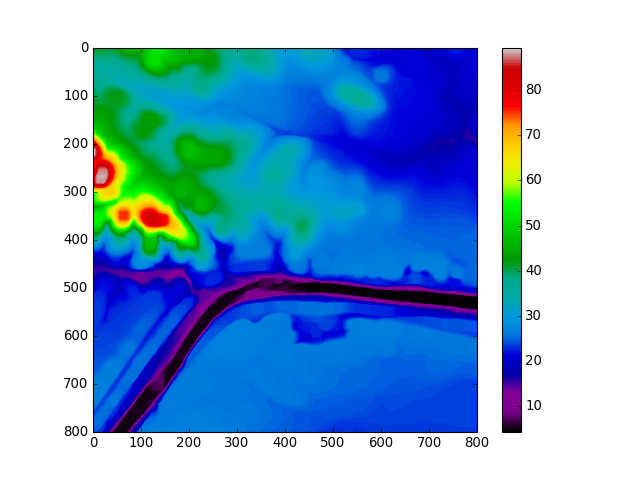

In [11]:
plt.imshow(subset, interpolation='nearest', cmap="nipy_spectral")
plt.colorbar()

In [12]:
I3 = uniform_filter(myarray, size=20, mode='constant')
subset_2 = I3[2000:2800, 3000:3800]

<IPython.core.display.Javascript object>


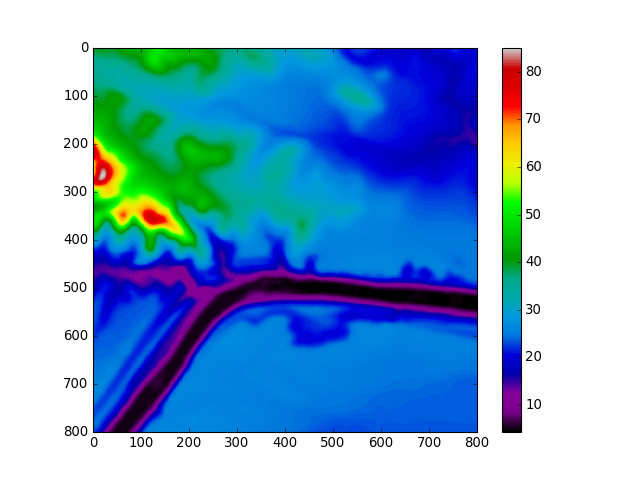

In [13]:
plt.imshow(subset_2, interpolation='nearest', cmap="nipy_spectral")
plt.colorbar()

<IPython.core.display.Javascript object>


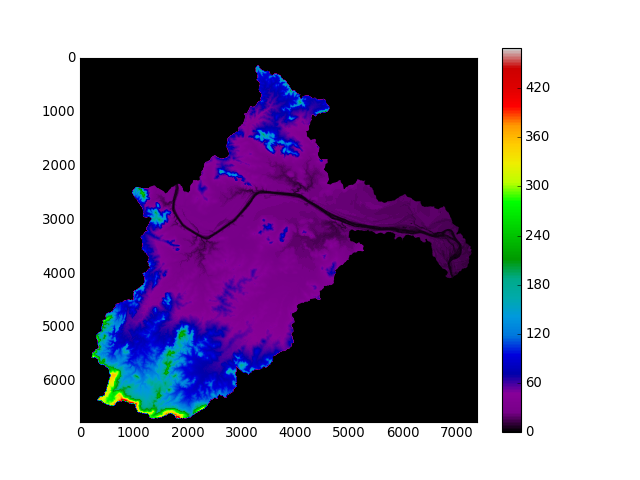

In [14]:
plt.imshow(I3, cmap="nipy_spectral")
plt.colorbar()

In [15]:
gullies = myarray - I3

<IPython.core.display.Javascript object>


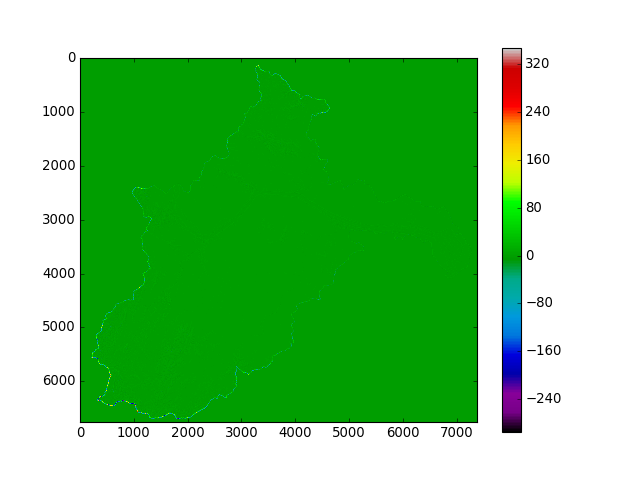

In [16]:
plt.imshow(gullies, interpolation='nearest', cmap="nipy_spectral")
plt.colorbar()

In [17]:
gully_subset = gullies[1000:2800, 1000:3800]

<IPython.core.display.Javascript object>


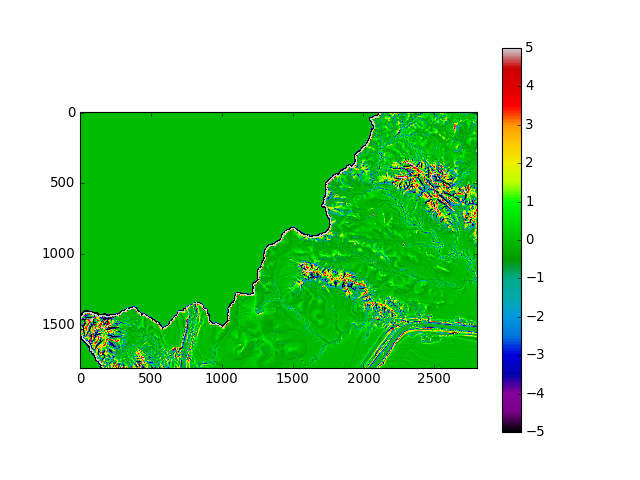

In [19]:
plt.imshow(gully_subset, interpolation='nearest', cmap="nipy_spectral", clim=(5, -5))
plt.colorbar()

In [21]:
gully_subset[gully_subset == 0] = np.nan

<IPython.core.display.Javascript object>


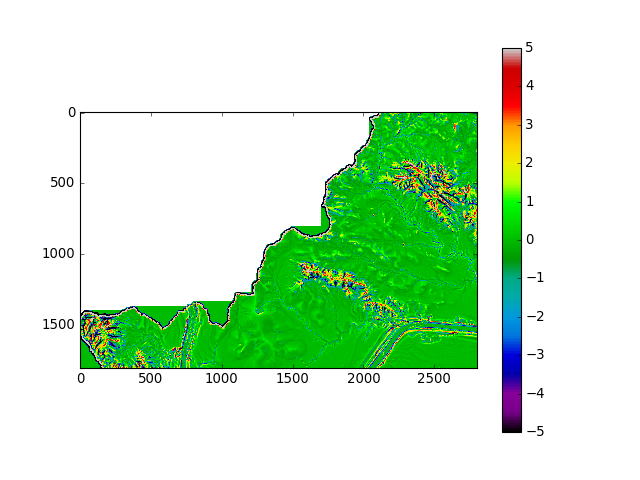

In [22]:
plt.imshow(gully_subset, interpolation='nearest', cmap="nipy_spectral", clim=(5, -5))
plt.colorbar()